In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import jax.numpy as jnp
from jax import grad, jit, random, partial, lax
from sgmcmcjax.kernels import build_sgld_kernel, build_sgldCV_kernel, build_badodab_kernel, build_baoab_kernel

import context
from models.bayesian_NN.NN_model import logprior, loglikelihood, init_network, accuracy_BNN
from models.bayesian_NN.NN_data import X_train, y_train, X_test, y_test
from util import flatten_param_list

from samplers.timed_sampler import timed_sampler
from tuning.gridsearch import run_gridsearch

# NN


In [2]:

batch_size = int(0.01*X_train.shape[0])
data = (X_train, y_train)

error_fn = lambda sam: -accuracy_BNN(sam[::10], X_test, y_test)

Niters = 1000
key = random.PRNGKey(0)
key, subkey = random.split(key)
params_IC = init_network(subkey)

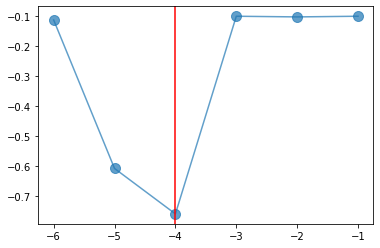

In [3]:
mykernel = lambda dt: build_sgld_kernel(dt, loglikelihood, logprior, data, batch_size)
log_dt_grid, ll_list = run_gridsearch(key, mykernel, error_fn, Niters, params_IC)

plt.plot(log_dt_grid, ll_list, marker="o", markersize=10, alpha=0.7)
plt.axvline(log_dt_grid[np.argmin(ll_list)], c='r')

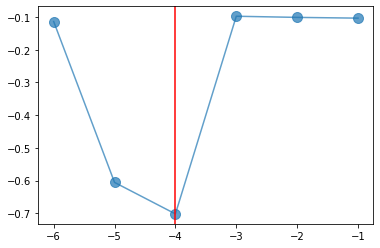

In [4]:
mykernel = lambda dt: build_sgldCV_kernel(dt, loglikelihood, logprior, data, batch_size, params_IC)
log_dt_grid, ll_list = run_gridsearch(key, mykernel, error_fn, Niters, params_IC)

plt.plot(log_dt_grid, ll_list, marker="o", markersize=10, alpha=0.7)
plt.axvline(log_dt_grid[np.argmin(ll_list)], c='r')